# Первая нейросетка

Ну что ж, пришло время построить свою первую нейронную сеть. У нас будет искуственная задачка и мы посмотрим на её примере, как работают различные алгоритмы машинного обучения.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv',index_col=0)

In [4]:
df.describe()

,x1,x2,y
count,10000.000000,10000.000000,10000.000000
mean,-0.029488,-0.098799,0.509700
std,4.981907,5.022414,0.499931
min,-9.988732,-9.972095,0.000000
25%,-4.062951,-4.170403,0.000000
50%,-0.063085,-0.097836,1.000000
75%,4.016095,3.880448,1.000000
max,9.985560,9.982304,1.000000


In [8]:
df.y.value_counts()

1    5097
0    4903
Name: y, dtype: int64

Как и в любой задаче машинного обучения для начала надо визуализировать данные.
Не зря же нашу нейронную сеть мы так долго учим?


<Axes: xlabel='x1', ylabel='x2'>

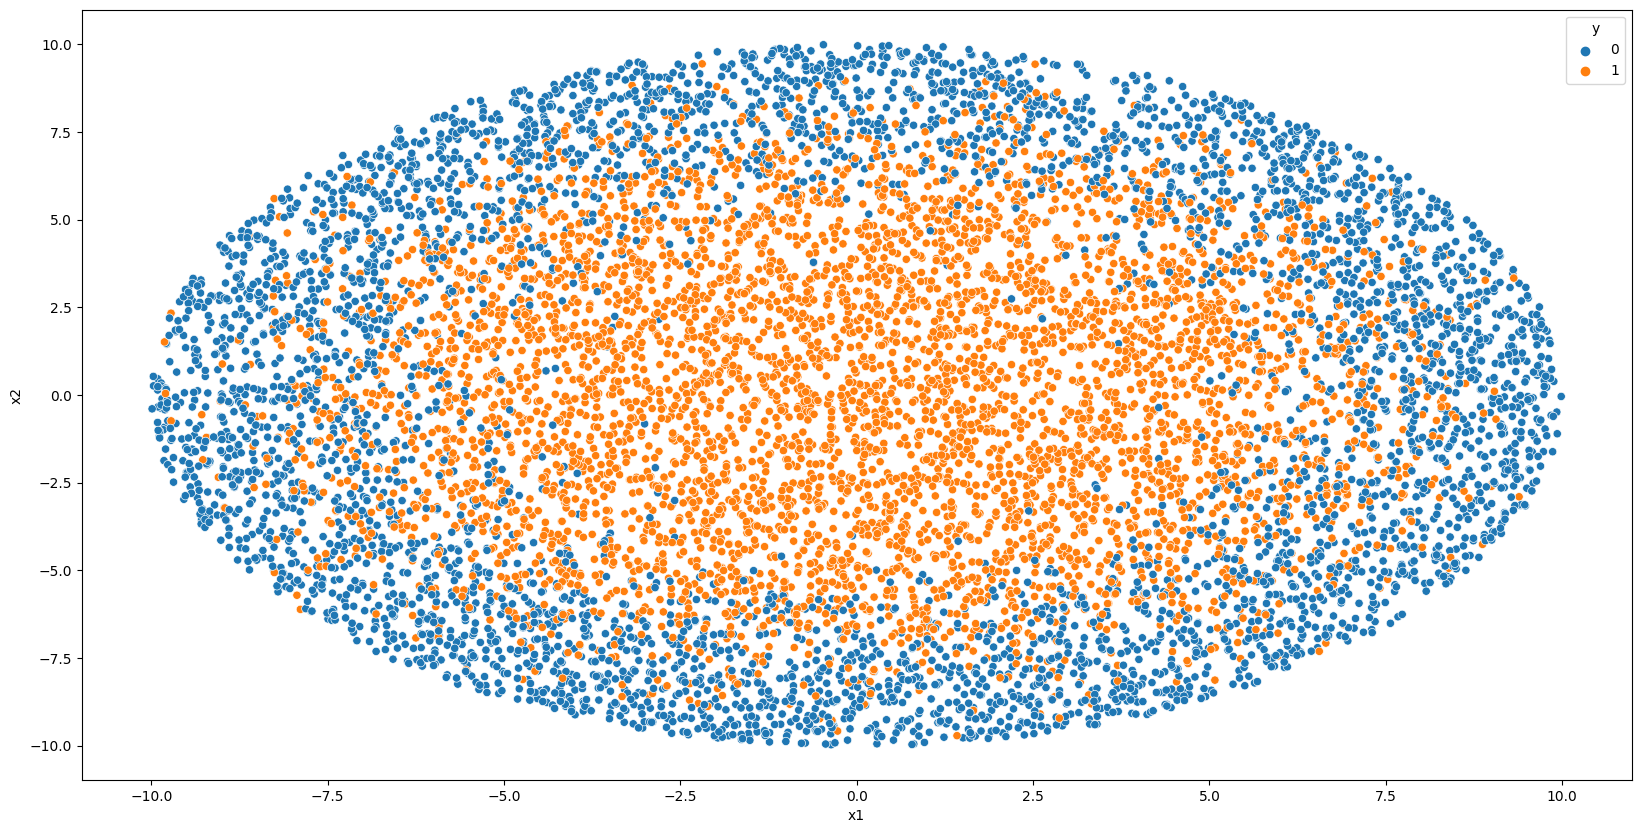

In [3]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x="x1", y="x2", hue="y", data = df)

После просмотра данных встает несколько вопросов:
 * 1) Можем ли мы построить идеальную модель ? (условная метрика точность)
 * 2) Что ещё мы хотим знать о выборке?
 * 3) Какие алгоритмы машинного обучения мы можем эффективно здесь использовать?



*   1) Наблюдается достаточно много выбросов, также граница между классами не такая четкая, поэтому добиться идеальной точности не удастся
*   2) Возможно хотелось бы знать природу данных, чтобы понимать причины и как действовать с аномалиями, так как они могут сильно повлиять на итоговую модель
*   3) Объекты обоих классов лежат достаточно кучно, должен хорошо сработать KNN. Также наблюдается довольно очевидная форма границы - эллипса, если скормить правильные фичи (то есть перейти к квадратам), то сработает любой алгоритм линейного разделения



После описательного анализа приступим к построению моделей. Для начала посмотрим, что нам даст Логистическая регрессия.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# разобьем выборку на трэйн/тест
X_train, X_test, y_train, y_test = train_test_split(df[['x1','x2']], df['y'], test_size = 0.33)

Точность нашей модели 0.5966666666666667


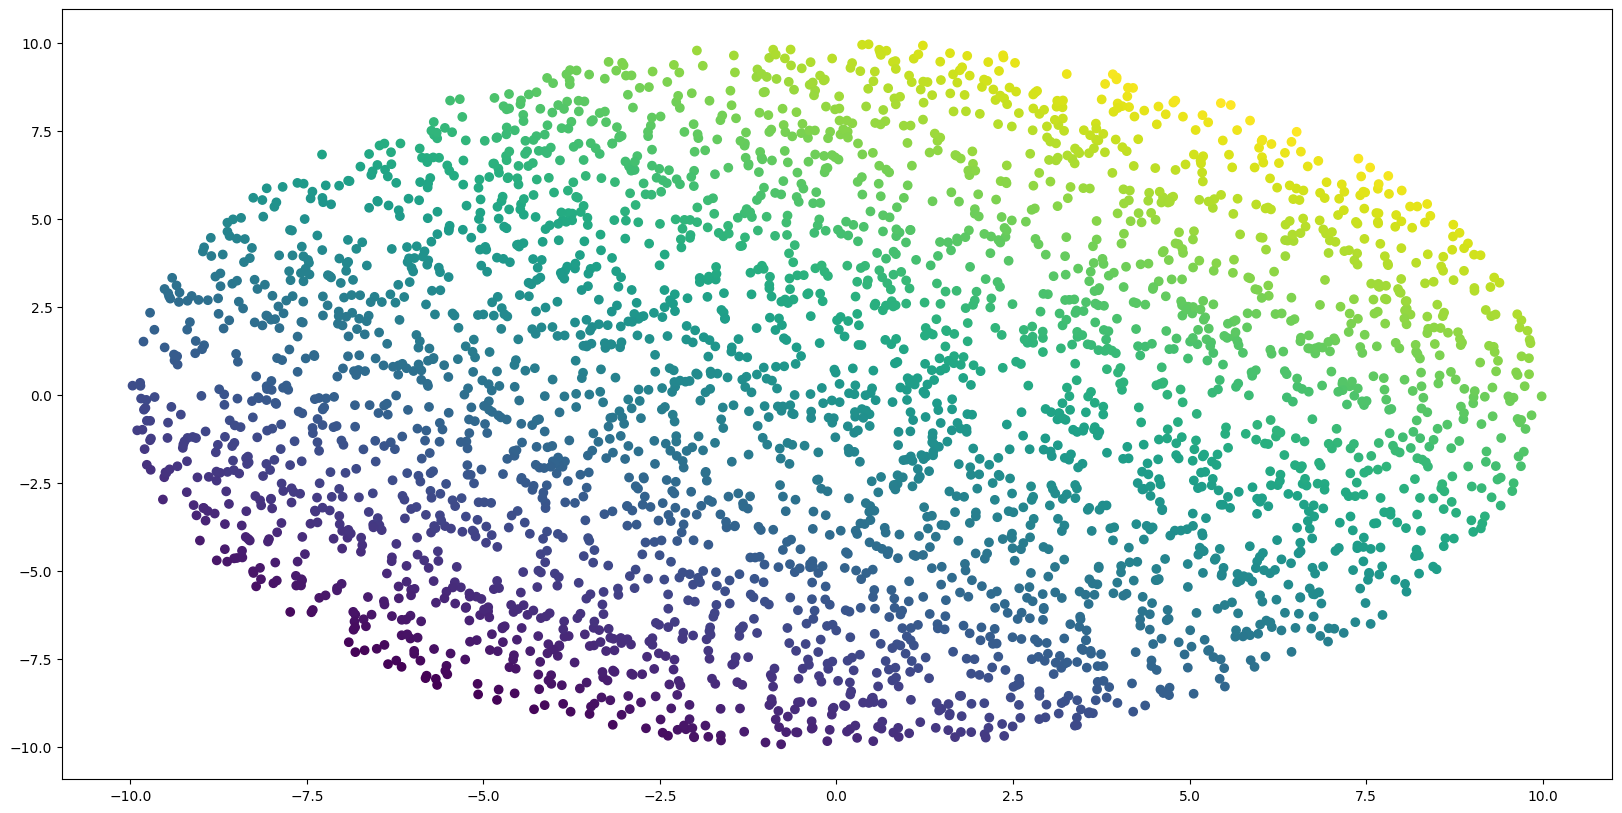

In [27]:
from sklearn.linear_model import LogisticRegression

# Ваш код для Логистической регрессии
logreg = LogisticRegression().fit(X_train, y_train)
predict_logit =  logreg.predict(X_test)
predict_log_proba = logreg.predict_log_proba(X_test)[:,1]

print(f'Точность нашей модели {accuracy_score(predict_logit, y_test)}')

# Заодно завизуализируем полученные результаты
plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_log_proba)
plt.show()

Вообще машинное обучение не только про алгоритмы (нейронные сети не исключение),
 а скорее про обработку данных. Что нам надо добавить, чтобы наш алгоритм отработал без проблем?

Точность нашей модели 0.8463636363636363


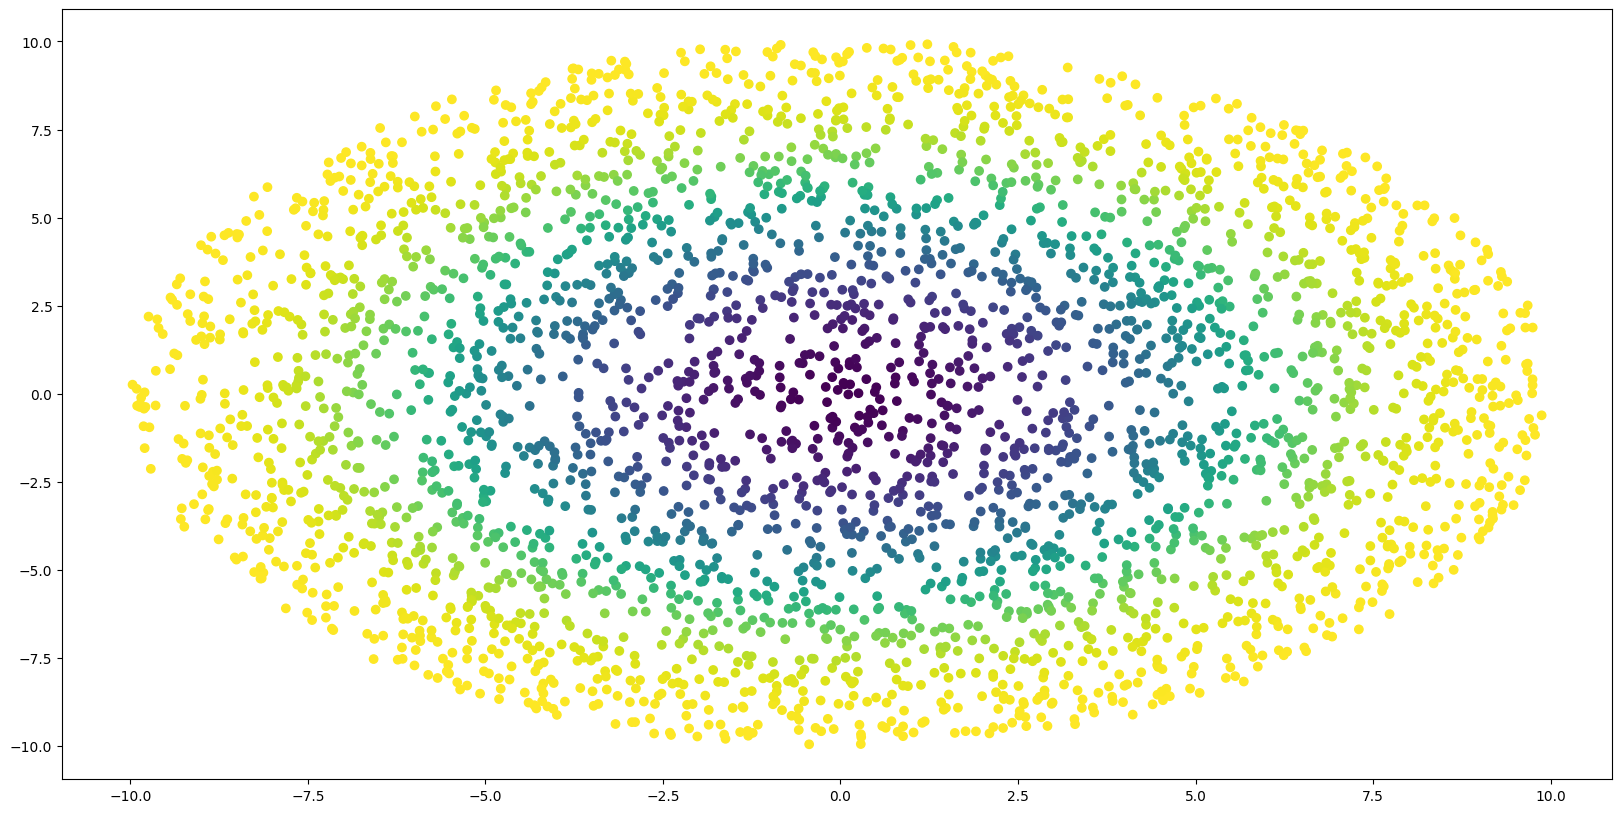

In [34]:
# Повторяем наш код, только с новыми фичами - смотрим на магию
df_new = df.copy()

#########################################
# ваш код для фичей и новой модели

df_new['x1**2'] = df_new.x1 * df_new.x1
df_new['x2**2'] = df_new.x2 * df_new.x2

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_new[['x1', 'x2', 'x1**2', 'x2**2']],
                                                                    df_new['y'], test_size = 0.33)

logreg = LogisticRegression().fit(X_train_new, y_train_new)
predict_logit =  logreg.predict(X_test_new)
predict_log_proba = logreg.predict_log_proba(X_test_new)[:,0]

#########################################

print(f'Точность нашей модели {accuracy_score(predict_logit,y_test_new)}')

plt.figure(figsize=(20, 10))
plt.scatter(X_test_new['x1'], X_test_new['x2'], c = predict_log_proba)
plt.show()

Переходим к следующиму классу алгоритмов - деревья решений. Какая особенность есть у деревьев? Какой параметр надо зафикисировать, чтобы эта особенность не испортила обучение?

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#########################################
# Ваш код

predict_tree = # ...
print(f'Точность нашей модели {accuracy_score(predict_tree, y_test)}')

predict_tree_proba = # ...

#########################################

plt.figure(figsize=(20,10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_tree_proba)
plt.show()

Поможет ли в данном случае ансамблирование? Когда в целом ансамбль дает хорошие результаты?

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#########################################
# Ваш код

predict_forest = # ...
print(f'Точность нашей модели {accuracy_score(predict_forest, y_test)}')

predict_forest_proba = # ...

#########################################

plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_forest_proba)
plt.show()

ну и наконец мы добрались до нейронок - пора собрать нашу нейроночку под эту задачу.

Соберем простенькую нейронку - нам хватит 2х слоев по 5 нейронов в каждом. Смотрим на предыдущую тетрадки и копипастим все нужное сюда!

In [ ]:
# Подгружаем понравившийся фраемворк
# Собираем сетку
# Учим и радуемся!

In [ ]:
#########################################
# Ваш код

predict_neural = # ...
predict_classes = # ...

print(f'Точность нашей модели {accuracy_score(predict_classes, y_test)}')
#########################################

plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_neural)
plt.show()